# Введение в логистическую регрессию

Когда специалисты по анализу данных сталкиваются с новой задачей классификации, первым алгоритмом, который приходит им на ум, является **логистическая регрессия**. Это алгоритм классификации с учителем, который используется для предсказания принадлежности наблюдений к дискретному набору классов. На практике он используется для классификации наблюдений по различным категориям. Следовательно, его результат носит дискретный характер. **Логистическая регрессия** также называется **Логит-регрессией**. Это один из самых простых, понятных и универсальных алгоритмов классификации, используемых для решения задач классификации.

### Алгоритм логистической регрессии говорит "с какой вероятностью объект принадлежит к определенному классу"
### Результат работы - значение от 0 до 1

Алгоритм логистической регрессии работает следующим образом:

## Примеры задач

### 1. Медицина

Прогнозирование заболевания:
На основании симптомов, анализов крови и возраста пациента предсказать, есть ли у него определённое заболевание (например, диабет, сердечно-сосудистое заболевание).

Классификация опухолей:
По характеристикам опухоли (размер, плотность, текстура на снимках) — доброкачественная или злокачественная.

### 2. Финансы

Скоринг клиентов в банке:
По истории платежей, доходу, возрасту, задолженностям предсказать, вернёт ли человек кредит (да/нет).

Обнаружение мошенничества:
По транзакции (сумма, место, время) классифицировать её как «нормальная» или «подозрительная».

### 3. Маркетинг и бизнес

Прогноз отклика на рекламу:
Будет ли клиент кликать по рекламному баннеру или нет.

Отток клиентов:
Останется ли клиент пользоваться услугой или уйдёт к конкуренту.

### 4. Социальные сети и интернет-сервисы

Классификация спама:
Письмо/сообщение — спам или нет.

Токсичность комментариев:
Текст комментария классифицируется как оскорбительный/неоскорбительный.

### 5. Промышленность и инженерия

Дефект продукции:
По характеристикам изделия с конвейера определить, является ли оно бракованным.

Предсказание поломок:
По показаниям датчиков прогнозировать, выйдет ли оборудование из строя в ближайшее время.

## **Линейное уравнение**

Алгоритм логистической регрессии работает, реализуя линейное уравнение с независимыми переменными для прогнозирования значения отклика. Например, рассмотрим задачу прогнозирования вероятности сдачи экзамена в зависимости от количества часов обучения. Количество часов обучения является переменной и обозначается как x1. Вероятность сдачи экзамена является целевой переменной (таргетом) и обозначается как z (иногда y).

Если у нас есть одна переменная (x1) и один таргет (z), то линейное уравнение будет математически записано следующим образом:

z = w0 + w1x1

Здесь коэффициенты w0 и w1 являются весами модели.

Если имеется несколько переменных, то приведенное целевая функция принимает вид:

$z = w0 + w1x1+ w2x2+……..+ wnxn$

## **Сигмоидальная функция**

Найденное значение z может быть любым числом, а нам нужна вероятность принадлежности классу.

### Как получена функция сигмоиды

Формула сигмоиды $σ(z) = 1 / (1 + e^{-z})$ вытекает из концепции отношения шансов (Odds Ratio).

Например, если вероятность: P = 0.8 (шанс на успех 80%, что объект класса 1), то шанс 

P / (1 - P) = 0.8 / 0.2 = 4
То есть "шансы на успех относятся к шансам на неудачу как 4 к 1".

#### Логит-функция (Log-Odds)
Шансы могут быть от 0 до +∞. Чтобы избавиться от ограничения снизу, мы берем натуральный логарифм и получаем логит.

$Logit(P) = ln(Odds) = ln( P / (1 - P) )$

Теперь значение может быть любым числом от -∞ до +∞.

#### Связь с линейной моделью
Идея логистической регрессии в том, что линейная комбинация признаков z = w₀ + w₁x₁ + ... моделирует именно этот логит (логарифм шансов).
z = ln( P / (1 - P) )

#### Вывод сигмоиды
Теперь мы можем выразить вероятность P через z:

z = ln( P / (1 - P) )

e^z = P / (1 - P) (экспоненцируем обе части)

e^z * (1 - P) = P

e^z - e^z * P = P

e^z = P + e^z * P = P(1 + e^z)

P = e^z / (1 + e^z)

Разделим числитель и знаменатель на e^z:

P = 1 / (e^{-z} + 1) = 1 / (1 + e^{-z})

Вывод: Сигмоида — это просто обратное преобразование от логита. Она переводит линейную комбинацию z (которая моделирует логарифм шансов) обратно в удобочитаемую вероятность.


Для этого предсказанное значение отклика z, преобразуется в значение вероятности, лежащее в диапазоне от 0 до 1 с использованием сигмоидальной функции.
Сигмоидальная функция задаётся математической формулой и представляется на графике как показано ниже.

![Sigmoid Function](data/sigmoid.jpg)


## **Граница принятия решения**

Сигмоидальная функция возвращает значение вероятности в диапазоне от 0 до 1. Это значение вероятности затем сопоставляется с дискретным классом, который может быть «0» или «1». Чтобы сопоставить это значение вероятности с дискретным классом (пройдено/не пройдено, да/нет, истинно/ложно), мы выбираем пороговое значение. Это пороговое значение называется границей принятия решения. Значения вероятности, превышающие это пороговое значение, относятся к классу 1, а значения, ниже этого порогового значения, — к классу 0.

Математически это можно выразить следующим образом:

p ≥ 0,5 => класс = 1

p < 0,5 => класс = 0

- Если z очень большое положительное число, то e^{-z} будет близко к 0, и вероятность P будет близка к 1 (скажем, 0.95 или 95%).
- Если z очень большое отрицательное число, то e^{-z} будет огромным, и вероятность P будет близка к 0 (скажем, 0.05 или 5%).
- Если z = 0, то вероятность P = 0.5 (50% - полная неопределенность, если это граница принятия решения).


Граница может быть смещена в большую или меньшую сторону. Например, при продаже элитных товаров, мы можем повысить порог, чтобы не делать предложения тем, кто врятли их купит. 

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## **Создание прогнозов**

Теперь мы знаем о сигмоидальной функции и границе принятия решений в логистической регрессии. 
Мы можем использовать наши знания о сигмоидальной функции и границе принятия решений для записи функции прогнозирования. Функция прогнозирования в логистической регрессии возвращает вероятность того, что наблюдение будет положительным, «Да» или «Истина». Мы называем это классом 1 и обозначаем P (класс = 1). Если вероятность приближается к единице, то мы более уверены в том, что наша модель соответствует классу 1, в противном случае — классу 0.

# Максимальное правдоподобие

Вопрос: какие параметры модели (веса w) с наибольшей вероятностью породили бы наши наблюдаемые данные?
Формулируем аккуратно.

---

### 1. Модель логистической регрессии

Вероятность отклика в логистической регрессии задаётся через **сигмоиду**:
$
P(y_i = 1 \mid x_i, w) = \sigma(w^\top x_i) = \frac{1}{1 + e^{-w^\top x_i}}.
$

Соответственно:
$
P(y_i = 0 \mid x_i, w) = 1 - \sigma(w^\top x_i).
$

---

### 2. Функция правдоподобия
Функция правдоподобия (Likelihood) — это вероятность наблюдать все наши данные при текущих весах модели. Для объекта с классом 1 мы вносим в правдоподобие P_i, а для объекта с классом 0 — (1 - P_i):

$
L(w) = \prod_{i=1}^n P(y_i \mid x_i, w).
$

Подставим вероятности:
$
L(w) = \prod_{i=1}^n \big[ \sigma(w^\top x_i)^{y_i} , \big(1 - \sigma(w^\top x_i)\big)^{1-y_i} \big].
$

---

### 3. Логарифм правдоподобия

Для удобства максимизации берем логарифм:
$
\log L(w) = \sum_{i=1}^n \Big( y_i \log \sigma(w^\top x_i) + (1 - y_i)\log \big(1 - \sigma(w^\top x_i)\big)\Big).
$

---

### 4. Задача максимального правдоподобия
Задача обучения — найти такие веса w, которые максимизируют LL(w). Это делается с помощью, например, градиентного подъема:
$
\hat{w} = \arg\max_{w} ; \ell(w).
$

Или эквивалентно — **минимизация отрицательного логарифма правдоподобия (NLL / log-loss):**
$
\hat{w} = \arg\min_{w} ; \Big[ - \sum_{i=1}^n \big( y_i \log \sigma(w^\top x_i) + (1-y_i)\log(1 - \sigma(w^\top x_i)) \big) \Big].
$



# **4. Типы логистической регрессии** <a class="anchor" id="4"></a>

Модели логистической регрессии можно разделить на три группы в зависимости от категорий целевой переменной. Эти три группы описаны ниже:

### 1. Бинарная логистическая регрессия (классификация)

В бинарной логистической регрессии целевая переменная имеет две возможные категории. Распространенные примеры категорий: «да» или «нет», «хорошо» или «плохо», «истина» или «ложь», «спам» или «не спам» и «пройдено» или «не пройдено».

### 2. Многоклассовая логистическая регрессия 

Чтобы предсказывать эти классы с помощью линейных моделей, задача многоклассовой классификации сводится к набору бинарных. Мы разберём два самых популярных способа это сделать – one-vs-all и all-vs-all


## Многоклассовая классификация 
One-vs-all или All-vs-all

![1vsall](data/one-vs-all.png)

![1vsall2](data/one-vs-all2.png)



# Метрики классификации


## Матрица ошибок

![errmatrix](data/error-matrix.png)

TP (True Positive) — модель правильно предсказала положительный класс.

TN (True Negative) — модель правильно предсказала отрицательный класс.

FP (False Positive) — модель ошибочно присвоила объекту класс 1 (ложное срабатывание).

FN (False Negative) — модель ошибочно не распознала объект класса 1.

## Основные метрики

## Accuracy (доля правильных ответов)

(TP + TN) / (TP + TN + FP + FN)

Показывает, какая доля предсказаний верна.

Хорошо работает, когда классы сбалансированы (и цена ошибок FP и FN примерно одинакова).

Плохо при сильном дисбалансе (например, 99% «здоровые», 1% «больные» — модель всегда говорит «здоров» и получает 99% accuracy, но бесполезна).

## Precision (точность, позитивная предсказательная ценность)

TP / (TP + FP)

Из всех предсказанных «положительных» сколько действительно положительные.

Важно, когда дорогая ошибка — ложное срабатывание (FP).

Пример: фильтр спама. Если precision низкий, то «нормальные письма» попадают в папку спам → это очень плохо.

## Recall (полнота, чувствительность, True Positive Rate)

TP / (TP + FN)

Из всех реальных «положительных» сколько модель правильно нашла.

Важно, когда дорогая ошибка — пропустить положительный случай (FN).

Пример: диагностика рака. Лучше поднять тревогу лишний раз (FP), чем пропустить больного пациента (FN).

## Specificity (специфичность, True Negative Rate)

TN / (TN + FP)

Из всех отрицательных сколько верно классифицировано.

Дополняет Recall.

Пример: когда даёт ложные срабатывания (не обвинит невиновного).

## F1-score

2 * (Precision * Recall) / (Precision + Recall)

Гармоническое среднее Precision и Recall.

Хорош, когда нужно балансировать между FP и FN.

Пример: поиск подозрительных транзакций в банке. Важно и не пропустить мошенничество (Recall), и не блокировать невинные платежи (Precision).

# Примеры для наглядности
from [labellf.io](https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score)



## ROC-AUC (площадь под ROC-кривой)

ROC-кривая: график зависимости Recall (True positive rate, TPR) от FPR (False Positive Rate) при варьировании порога классификации.

AUC (Area Under Curve): чем выше, тем лучше.

ROC: Receiver Operating Characteristic

TPR = TP / (TP + FN) - насколько хорошо мы находим действительно больных (найденных больных делим на всего больных)

FPR = FP / (FP + TN) - насколько часто мы ошибаемся в определении БОЛЬНЫХ (количетсво здоровых, которых назвали больными делим на всего здоровых)

Измеряет, насколько хорошо модель ранжирует объекты (отделяет классы).

- Пример: кредитный скоринг. Не важен конкретный порог, главное — правильно ранжировать клиентов по риску.

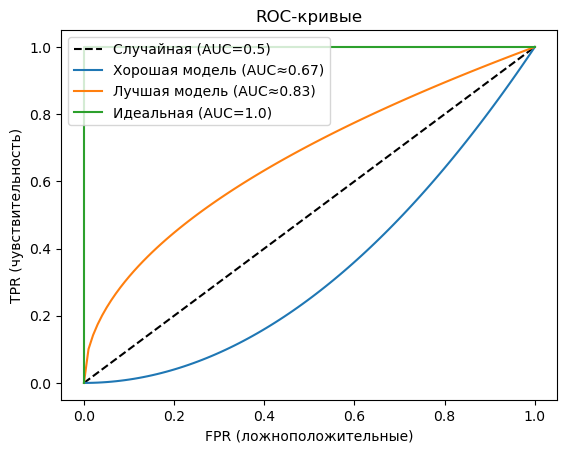

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# пример кривых
fpr = np.linspace(0, 1, 100)
plt.plot(fpr, fpr, 'k--', label="Случайная (AUC=0.5)")
plt.plot(fpr, fpr**2, label="Хорошая модель (AUC≈0.67)")
plt.plot(fpr, fpr**0.5, label="Лучшая модель (AUC≈0.83)")
plt.plot([0,0,1],[0,1,1], label="Идеальная (AUC=1.0)")

plt.xlabel("FPR (ложноположительные)")
plt.ylabel("TPR (чувствительность)")
plt.title("ROC-кривые")
plt.legend()
plt.show()

![errmatrix](data/roc-auc.png)

### Интерпретация графика

- Точка (0,0) — «всех считаем отрицательными»
- Точка (1,1) — «всех считаем положительными»
- Диагональ (линия y = x) — ???.

Чем ближе ROC-кривая к верхнему левому углу (0,1), тем модель лучше.

# Когда какую метрику выбирать

Accuracy — только при сбалансированных классах.

Precision — когда ложные срабатывания хуже пропусков.
- ПРИМЕР: Спам-фильтр, рекомендательные системы (лучше не рекомендовать, чем рекомендовать мусор).

Recall — когда пропуск стоит дорого.
- ПРИМЕР: Медицинские тесты, системы безопасности (лучше проверить лишний раз).

F1-score — когда важен баланс Precision и Recall.
- ПРИМЕР: Поиск мошенничества, информационный поиск.

ROC-AUC — когда важна способность модели отделять классы при любом пороге.
- ПРИМЕР: Кредитный скоринг, маркетинговые прогнозы.

PR-AUC — при дисбалансе классов.
- ПРИМЕР: Фрод, редкие заболевания.